# IBM Utility Experiment Error Comparison Versus EVCDR

Data extracted from the following work:
> Kim, Y., Eddins, A., Anand, S., Wei, K. X., Van Den Berg, E., Rosenblatt, S., ... & Kandala, A. (2023). Evidence for the utility of quantum computing before fault tolerance. Nature, 618(7965), 500-505.

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import Normalize, LogNorm
import numpy as np
import json

with open('data/IBM_evidence_comparison/IBM_data_compiled.json', 'r') as infile:
    IBM_data = json.load(infile)
with open('data/IBM_evidence_comparison/EVCDR_data_compiled.json', 'r') as infile:
    EVCDR_data = json.load(infile)
plasma0=plt.cm.plasma_r(0.15)
plasma3=plt.cm.plasma_r(.93)

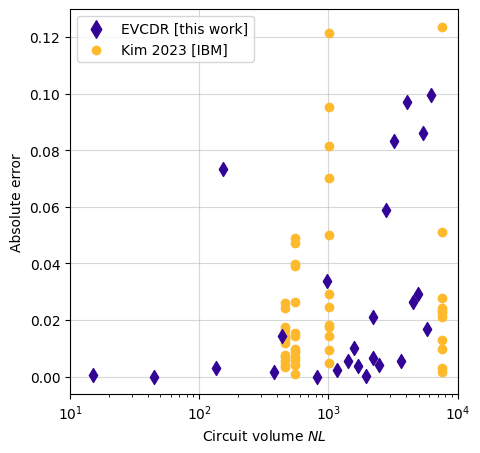

In [4]:
plt.rc('axes', axisbelow=True)
fig, axis = plt.subplots(figsize=(5,5))

for ind,_data in IBM_data.items():
    ind=int(ind)
    vol = _data['n_qubits']*_data['CNOT_depth']
    x = np.array(_data['angles'])
    stepsize = x[1]
    timesteps = x/stepsize
    y = np.array(_data['errors'])
    axis.scatter([vol]*len(y), y, color=plasma0, marker='o')
        
for ind,_data in EVCDR_data.items():
    ind=int(ind)
    vol = np.array(_data['n_qubits_lightcone'])*np.array(_data['nonlocal_depths'])
    x = np.array(_data['angles'])
    stepsize = x[1]
    timesteps = x/stepsize
    y = np.array(_data['errors'])
    axis.scatter(vol, y, color=plasma3, marker='d', zorder=9, s=50)
    
axis.scatter([], [], color=plasma3, marker='d', s=80, label='EVCDR [this work]')
axis.scatter([], [], color=plasma0, marker='o', label='Kim 2023 [IBM]')

axis.legend()#loc='lower left')
axis.grid(alpha=0.5)
axis.set_xlabel('Circuit volume $NL$')
axis.set_ylabel('Absolute error')
axis.set_xscale('log')
# axis.set_yscale('log')
axis.set_xlim(10, 10000)
# fig.savefig('plots/EVCDR_versus_IBM.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()